# Section 1: Business Understanding
Airbnb has become a popular website for travelers all over the world. We can use this not only to find accommodations, but also to explore our destination. Therefore, more and more hosts, who want to rent their place, want to do business on Airbnb. However, some of them do not know how they can set a reasonable price. Let's help them by answering several quesstions:
## 1. Do locations of the house affect the prices ?
## 2. How prices for all Boston’s Airbnb fluctuate throughout the period 2016-2017?
## 3. Which features will have high impact on prices ?
## 4. Can we predict the rental price of new listings based on a model ?

In [2]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
cd = os.getcwd()
import re
import statsmodels.api as sm

# magic word for producing visualizations in notebook
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from IPython.display import Image
from sklearn.tree import DecisionTreeRegressor


# Section 2: Data Understanding


In [18]:
# Read the csv file:
listings = pd.read_csv('listings.csv')
reviews = pd.read_csv('reviews.csv')
calendar = pd.read_csv('calendar.csv')

## 2.1 Listings


In [4]:
# Check the shape of listings data:
print(listings.shape)
listings.head()

(3585, 95)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [5]:
# Check how numerical featuers distributed:
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,...,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,...,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,8.516813e-01,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,...,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,...,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


In [6]:
# Take a look at all columns:
list(listings.columns)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


In [7]:
# Which columns has missing values ?
listings.isna().sum().sort_values(ascending = False)

has_availability                3585
license                         3585
neighbourhood_group_cleansed    3585
jurisdiction_names              3585
square_feet                     3529
                                ... 
is_location_exact                  0
room_type                          0
accommodates                       0
bed_type                           0
country                            0
Length: 95, dtype: int64

As we can see, many columns have missing values. Some of them even have no entry.

In [8]:
# Fingding columns with 0 missing values
listings_no_null = listings.columns[listings.isnull().mean() == 0]
listings_no_null

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'experiences_offered', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood_cleansed', 'state', 'smart_location',
       'country_code', 'country', 'latitude', 'longitude', 'is_location_exact',
       'room_type', 'accommodates', 'bed_type', 'amenities', 'price',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'calendar_updated', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'calendar_last_scraped',
       'number_of_reviews', 'requires_license', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'calculat

In [9]:
# Fingding columns with > 75% missing values
listings_no_null = listings.columns[listings.isnull().mean() > 0.75]
listings_no_null

Index(['neighbourhood_group_cleansed', 'square_feet', 'weekly_price',
       'monthly_price', 'has_availability', 'license', 'jurisdiction_names'],
      dtype='object')

Base on exploration, columns with > 75% missing values should be drop.


## 2.2. Calendar 

In [12]:
# Check the shape of Calendar data:
print(calendar.shape)
calendar.head()

(1308890, 4)


,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [13]:
# Find missing values:
calendar.isna().sum()

listing_id         0
date               0
available          0
price         665853
dtype: int64

## 2.3 Reviews

In [15]:
# Check the shape of reviews data:
print(reviews.shape)
reviews.head()

(68275, 6)


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [16]:
# Find missing values:
reviews.isna().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         53
dtype: int64

# Section 3: Prepare Data

## 3.1 Listings 

As we can see, data in column 'Price' having format '$xx'. We should re-format it to numerical data to analyze:

In [19]:
# Re-format data:
listings.price = listings.price.str.replace(',','')
listings.price = listings.price.str.replace('$','')
listings['price'] = listings['price'].astype(float)

C:\Users\HuongLan\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


We will use listings data for model to predict, so let's prepare the data:

In [21]:
# Find all categorical features:
cat_cols = listings.select_dtypes(include = 'object').columns
# factorize categorical features:
fac_cols = {}
for i in cat_cols:
    fac_cols[i] = pd.factorize(listings[i])[0]
# Prepare a dataframe for analyze correlations:
prep_df = pd.DataFrame(fac_cols)


In [126]:
# Find all numerical features:
num_cols = []
for i in listings.columns:
    if i not in cat_cols:
        num_cols.append(i)
# Adding numerical features to prepared dataframe:
prep_df[num_cols] = listings[num_cols]
# Check prepared dataframe
print(prep_df.shape)
prep_df.head()

(3585, 95)


,listing_url,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
0,0,0,0,0,0,0,0,0,-1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
1,1,0,1,1,1,1,0,1,0,1,...,10.0,9.0,10.0,10.0,9.0,9.0,NaN,NaN,1,1.30
2,2,0,2,2,2,2,0,2,1,2,...,10.0,9.0,10.0,10.0,9.0,10.0,NaN,NaN,1,0.47
3,3,0,3,3,3,3,0,3,2,3,...,10.0,10.0,10.0,10.0,10.0,10.0,NaN,NaN,1,1.00
4,4,0,4,4,4,4,0,4,3,4,...,10.0,10.0,10.0,10.0,9.0,10.0,NaN,NaN,1,2.25


Now, we can use correlation matrix, to find out which features are most correlated to 'Price'. If the correlation score is close to 1 or -1, the feature is strong correlated with 'Price': 

In [127]:
# Find strong correltaed columns:
corr_cols = []
for col in abs(1-prep_df.corr()['price']).index:
    if (1 - abs(prep_df.corr()['price']))[col] < 0.9:
        corr_cols.append(col)
print(len(corr_cols))
corr_cols 

31


['thumbnail_url',
 'medium_url',
 'xl_picture_url',
 'host_url',
 'host_acceptance_rate',
 'host_thumbnail_url',
 'host_picture_url',
 'room_type',
 'bed_type',
 'security_deposit',
 'cleaning_fee',
 'cancellation_policy',
 'require_guest_phone_verification',
 'host_listings_count',
 'host_total_listings_count',
 'latitude',
 'longitude',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'square_feet',
 'price',
 'guests_included',
 'availability_30',
 'availability_60',
 'review_scores_rating',
 'review_scores_cleanliness',
 'review_scores_location',
 'calculated_host_listings_count',
 'reviews_per_month']

In [129]:
# Make a datafrome for strong correlated columns:
df_listings = listings[corr_cols]
df_listings

,thumbnail_url,medium_url,xl_picture_url,host_url,host_acceptance_rate,host_thumbnail_url,host_picture_url,room_type,bed_type,security_deposit,...,square_feet,price,guests_included,availability_30,availability_60,review_scores_rating,review_scores_cleanliness,review_scores_location,calculated_host_listings_count,reviews_per_month
0,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://www.airbnb.com/users/show/31303940,NaN,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Entire home/apt,Real Bed,NaN,...,NaN,250.0,1,0,0,NaN,NaN,NaN,1,NaN
1,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://www.airbnb.com/users/show/2572247,100%,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Private room,Real Bed,$95.00,...,NaN,65.0,0,26,54,94.0,9.0,9.0,1,1.30
2,https://a2.muscache.com/im/pictures/6ae8335d-9...,https://a2.muscache.com/im/pictures/6ae8335d-9...,https://a2.muscache.com/im/pictures/6ae8335d-9...,https://www.airbnb.com/users/show/16701,88%,https://a2.muscache.com/im/users/16701/profile...,https://a2.muscache.com/im/users/16701/profile...,Private room,Real Bed,NaN,...,NaN,65.0,1,19,46,98.0,9.0,9.0,1,0.47
3,https://a2.muscache.com/im/pictures/39764190-1...,https://a2.muscache.com/im/pictures/39764190-1...,https://a2.muscache.com/im/pictures/39764190-1...,https://www.airbnb.com/users/show/6031442,50%,https://a2.muscache.com/im/pictures/5d430cde-7...,https://a2.muscache.com/im/pictures/5d430cde-7...,Private room,Real Bed,$100.00,...,NaN,75.0,2,6,16,100.0,10.0,10.0,1,1.00
4,https://a1.muscache.com/im/pictures/97154760/8...,https://a1.muscache.com/im/pictures/97154760/8...,https://a1.muscache.com/im/pictures/97154760/8...,https://www.airbnb.com/users/show/15396970,100%,https://a0.muscache.com/im/users/15396970/prof...,https://a0.muscache.com/im/users/15396970/prof...,Private room,Real Bed,NaN,...,NaN,79.0,1,13,34,99.0,10.0,9.0,1,2.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,https://a2.muscache.com/im/pictures/809e828a-c...,https://a2.muscache.com/im/pictures/809e828a-c...,https://a2.muscache.com/im/pictures/809e828a-c...,https://www.airbnb.com/users/show/19246369,100%,https://a2.muscache.com/im/users/19246369/prof...,https://a2.muscache.com/im/users/19246369/prof...,Private room,Real Bed,$95.00,...,NaN,69.0,1,21,51,90.0,10.0,8.0,8,0.34
3581,https://a2.muscache.com/im/pictures/e833ccdc-6...,https://a2.muscache.com/im/pictures/e833ccdc-6...,https://a2.muscache.com/im/pictures/e833ccdc-6...,https://www.airbnb.com/users/show/37366454,83%,https://a2.muscache.com/im/pictures/685b7a0d-8...,https://a2.muscache.com/im/pictures/685b7a0d-8...,Private room,Real Bed,$100.00,...,NaN,150.0,1,29,59,NaN,NaN,NaN,2,NaN
3582,https://a2.muscache.com/im/pictures/eb32a608-a...,https://a2.muscache.com/im/pictures/eb32a608-a...,https://a2.muscache.com/im/pictures/eb32a608-a...,https://www.airbnb.com/users/show/11311919,50%,https://a0.muscache.com/im/users/11311919/prof...,https://a0.muscache.com/im/users/11311919/prof...,Entire home/apt,Real Bed,NaN,...,NaN,198.0,1,0,15,NaN,NaN,NaN,1,NaN
3583,https://a2.muscache.com/im/pictures/4b56e0c4-6...,https://a2.muscache.com/im/pictures/4b56e0c4-6...,https://a2.muscache.com/im/pictures/4b56e0c4-6...,https://www.airbnb.com/users/show/74318064,96%,https://a2.muscache.com/im/pictures/312fe94a-c...,https://a2.muscache.com/im/pictures/312fe94a-c...,Private room,Real Bed,$100.00,...,NaN,65.0,1,5,5,90.0,8.0,8.0,1,2.00


However, not all features can be used. We can not use url features for model. We can not use host_total_listings_count, which is depend on host_listings_count. We also can not use features with many missing values:

In [130]:
# Find columns with high proportion of missing values:
df_listings.columns[df_listings.isnull().mean() > 0.6]


Index(['security_deposit', 'square_feet'], dtype='object')

In [131]:
# Drop columns which can not be used:
df_listings = df_listings.drop(['security_deposit','square_feet', 'host_total_listings_count','thumbnail_url','medium_url',
                                 'xl_picture_url','host_url','host_thumbnail_url','host_picture_url'], 1)

C:\Users\HuongLan\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [132]:
# Take a look at data set:
df_listings.head()

,host_acceptance_rate,room_type,bed_type,cleaning_fee,cancellation_policy,require_guest_phone_verification,host_listings_count,latitude,longitude,accommodates,...,beds,price,guests_included,availability_30,availability_60,review_scores_rating,review_scores_cleanliness,review_scores_location,calculated_host_listings_count,reviews_per_month
0,NaN,Entire home/apt,Real Bed,$35.00,moderate,f,1,42.282619,-71.133068,4,...,3.0,250.0,1,0,0,NaN,NaN,NaN,1,NaN
1,100%,Private room,Real Bed,$10.00,moderate,f,1,42.286241,-71.134374,2,...,1.0,65.0,0,26,54,94.0,9.0,9.0,1,1.30
2,88%,Private room,Real Bed,NaN,moderate,f,1,42.292438,-71.135765,2,...,1.0,65.0,1,19,46,98.0,9.0,9.0,1,0.47
3,50%,Private room,Real Bed,$50.00,moderate,f,1,42.281106,-71.121021,4,...,2.0,75.0,2,6,16,100.0,10.0,10.0,1,1.00
4,100%,Private room,Real Bed,$15.00,flexible,f,1,42.284512,-71.136258,2,...,2.0,79.0,1,13,34,99.0,10.0,9.0,1,2.25


As we can see, some data is not in correct format, like host_acceptance_rate or cleaning_fee, so I will re-format them:

In [133]:
# Re-format data:
def re_format(cols):
    '''
    Input: column in wrong format
    Output: column after re-format to float
    '''
    return cols.astype(float)

df_listings.accommodates = re_format(df_listings.accommodates)
df_listings.cleaning_fee = df_listings.cleaning_fee.str.replace(',','')
df_listings.cleaning_fee = df_listings.cleaning_fee.str.replace('$','')
df_listings['cleaning_fee'] = re_format(df_listings['cleaning_fee'])
df_listings.host_acceptance_rate = df_listings.host_acceptance_rate.str.replace('%','')
df_listings['host_acceptance_rate'] = re_format(df_listings['host_acceptance_rate'])

C:\Users\HuongLan\anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  # This is added back by InteractiveShellApp.init_path()


In [134]:
# Check data types:
df_listings.dtypes

host_acceptance_rate                float64
room_type                            object
bed_type                             object
cleaning_fee                        float64
cancellation_policy                  object
require_guest_phone_verification     object
host_listings_count                   int64
latitude                            float64
longitude                           float64
accommodates                        float64
bathrooms                           float64
bedrooms                            float64
beds                                float64
price                               float64
guests_included                       int64
availability_30                       int64
availability_60                       int64
review_scores_rating                float64
review_scores_cleanliness           float64
review_scores_location              float64
calculated_host_listings_count        int64
reviews_per_month                   float64
dtype: object

In [135]:
# Count missing values:
df_listings.isnull().sum()

host_acceptance_rate                 471
room_type                              0
bed_type                               0
cleaning_fee                        1107
cancellation_policy                    0
require_guest_phone_verification       0
host_listings_count                    0
latitude                               0
longitude                              0
accommodates                           0
bathrooms                             14
bedrooms                              10
beds                                   9
price                                  0
guests_included                        0
availability_30                        0
availability_60                        0
review_scores_rating                 813
review_scores_cleanliness            818
review_scores_location               822
calculated_host_listings_count         0
reviews_per_month                    756
dtype: int64

Most of missing values in reviews features. Reviews are given by the customers, and each customer has diffrent experience. Therfore, reviews values are independent, and we should not impute missing values by average score.

In [136]:
# Drop missing values:
df_listings = df_listings.dropna(axis = 0, subset = df_listings.columns[df_listings.isnull().sum() > 0])
df_listings.shape

(1843, 22)

In [137]:
def clean_data(df):
    '''
    Input: df - DataFrame
    Output: df - DataFrame after cleaning
    
    Perform to obtain the correct df
    This function cleans df using the following steps to produce df:
    1. Drop all the rows with missing values
    2. Create dummy columns for all the categorical variables in df, drop the original columns
    '''
    df = df.dropna(axis = 0, subset = df_listings.columns[df_listings.isnull().sum() > 0])
    # Find categorical features:
    cat_vars = df_listings.select_dtypes(include = 'object').columns
    for var in cat_vars:
        df = pd.concat([df.drop(var, axis = 1), pd.get_dummies(df[var], 
                                prefix = var, prefix_sep = '_', drop_first = True)], axis = 1)
    return df

In [138]:
df_listings = clean_data(df_listings)

In [139]:
# Check new data after getting dummy:
print(df_listings.shape)
df_listings.head()

(1843, 28)


,host_acceptance_rate,cleaning_fee,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,...,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,require_guest_phone_verification_t
1,100.0,10.0,1,42.286241,-71.134374,2.0,1.0,1.0,1.0,65.0,...,1,0,0,0,0,1,1,0,0,0
3,50.0,50.0,1,42.281106,-71.121021,4.0,1.0,1.0,2.0,75.0,...,1,0,0,0,0,1,1,0,0,0
4,100.0,15.0,1,42.284512,-71.136258,2.0,1.5,1.0,2.0,79.0,...,1,0,0,0,0,1,0,0,0,0
5,95.0,30.0,2,42.291690,-71.131893,2.0,1.0,1.0,1.0,75.0,...,1,0,0,0,0,1,0,0,0,0
7,100.0,10.0,2,42.281946,-71.141022,2.0,2.0,1.0,1.0,75.0,...,1,0,0,0,0,1,1,0,0,1


## 3.2. Calendar

The price is not distributed differently in diffent period of time, so we should not impute  average price for missing values.

In [72]:
# Drop missing values in column 'price'
calendar = calendar.dropna(subset = ['price'])

In [73]:
# Re-format 'date' feature:
calendar['date'] = pd.to_datetime(calendar['date'])
calendar.price = calendar.price.str.replace(',','')
calendar.price = calendar.price.str.replace('$','')
calendar['price'] = re_format(calendar['price'])

C:\Users\HuongLan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


## 3.3. Reviews

We cannot impute random comments into dataset, so we have to drop all missing values.

In [80]:
# drop missing values:
reviews.dropna(axis = 0)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...
...,...,...,...,...,...,...
68270,7462268,80537457,2016-06-18,22034145,Antonio,Joe y su mujer son encantadores. La habitación...
68271,7462268,83640094,2016-07-03,40052513,Steve,Joe was on his way to Jamaica to be married! o...
68272,7462268,85797088,2016-07-13,77129134,Nick,The room was very clean as were the bathrooms ...
68273,7462268,97264637,2016-08-26,15799803,Vid,Staying in Lower Allston at Joe and Nancy's pl...


# Section 4: Modeling

In [140]:
# Prepare data for modeling:
df_copy = df_listings.copy()
# Y is the predict column, here is 'price column'
Y = df_listings['price']
# X is set of vectors which is used to predict:
X = df_copy.drop('price', 1)

C:\Users\HuongLan\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [141]:
# Split X and Y into train set and test set. Test size is 20%:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 42)

In [142]:
print('The train set has ' + str(len(Y_train)) + ' rows.')
print('The test set has ' + str(len(Y_test)) + ' rows.')

The train set has 1474 rows.
The test set has 369 rows.


In [143]:
# Fit Linear Regression model
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [144]:
# Use the model to predict:
pred = model.predict(X_test)


# Section 5: Evaluate the result

## Q1. Do locations of the house affect the prices ?

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

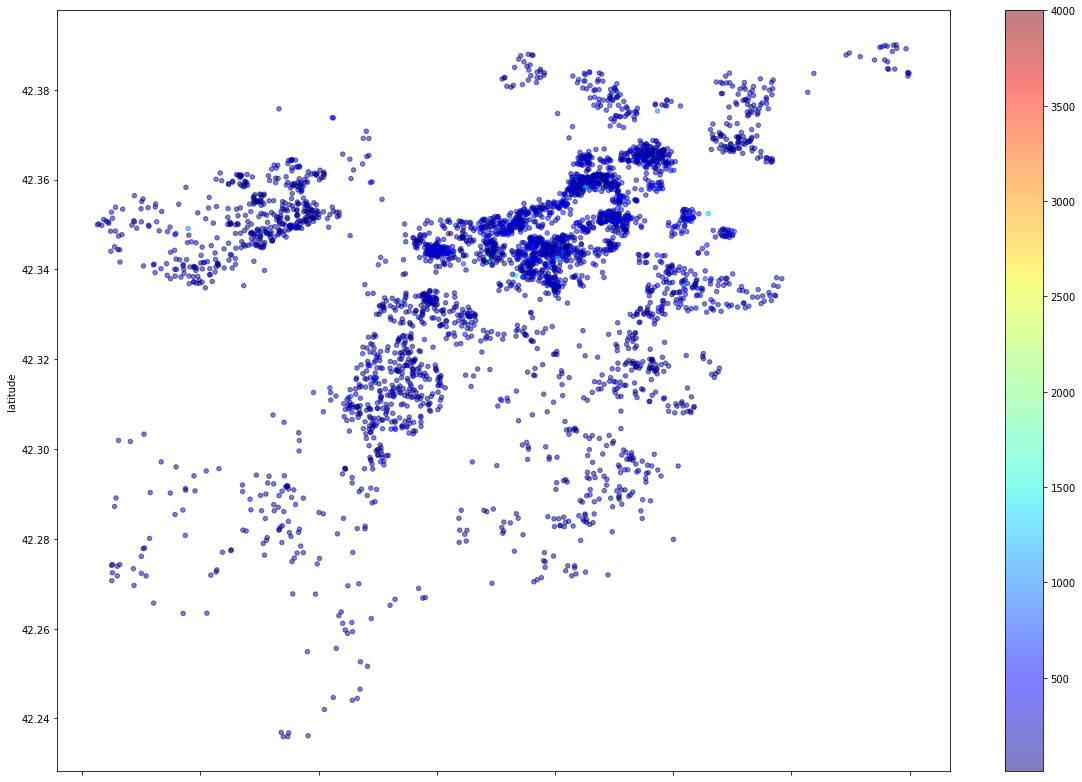

In [94]:
# PLot the distribution of rental prices:
listings.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.5, c = listings['price'], cmap = plt.get_cmap('jet'), colorbar=True, figsize = (20,14) )


In [95]:
# Average price by neirborhood 
listings.groupby(['neighbourhood']).mean()['price'].sort_values()

neighbourhood
Chestnut Hill          70.750000
Mattapan               72.000000
Somerville             93.076923
Hyde Park              93.680000
Dorchester             97.451282
Roslindale             99.160000
West Roxbury          111.342857
Allston-Brighton      114.162088
East Boston           124.059829
Mission Hill          127.805825
Brookline             130.375000
Jamaica Plain         140.687898
Roxbury               147.637931
North End             195.512000
Downtown              196.500000
Cambridge             203.000000
Government Center     205.333333
South End             206.721477
Charlestown           210.050633
Beacon Hill           212.080460
West End              221.602941
Fenway/Kenmore        230.104418
South Boston          232.120370
Theater District      234.151515
Chinatown             235.410256
Back Bay              245.457045
Leather District      245.875000
Downtown Crossing     273.500000
Financial District    283.692308
Harvard Square        359.000

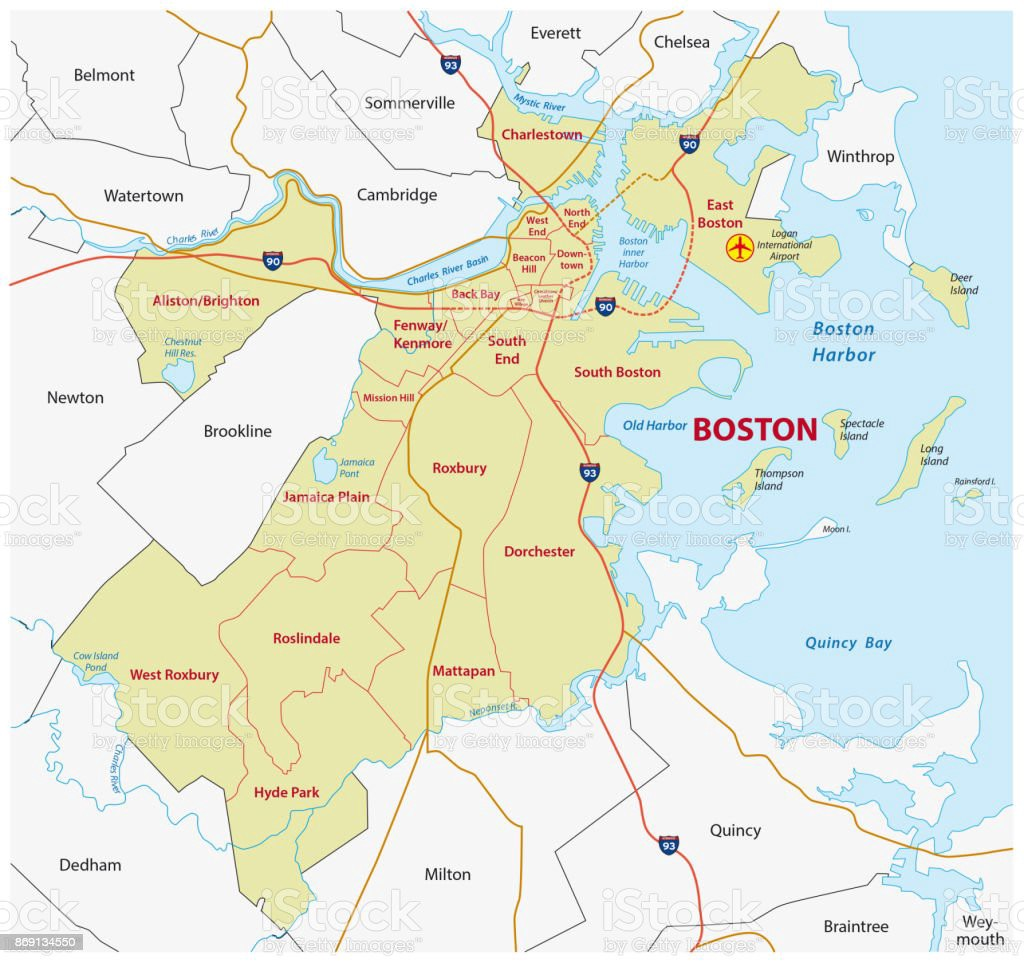

Compart with map of Boston, we can see that, accommodations, where are close to the sea, are tend to have higher prices. It is quite understandable, because many people visit Boston because of it beautiful beach.

## Q2. How prices for all Boston’s Airbnb fluctuate throughout the period 2016-2017?

In [96]:
# Average rental price by date:
prices = pd.DataFrame(calendar.groupby(['date']).mean()['price']).reset_index()
prices

,date,price
0,2016-09-06,241.043860
1,2016-09-07,251.833691
2,2016-09-08,251.748749
3,2016-09-09,261.859327
4,2016-09-10,266.847280
...,...,...
360,2017-09-01,202.046797
361,2017-09-02,197.997775
362,2017-09-03,192.566038
363,2017-09-04,189.907829


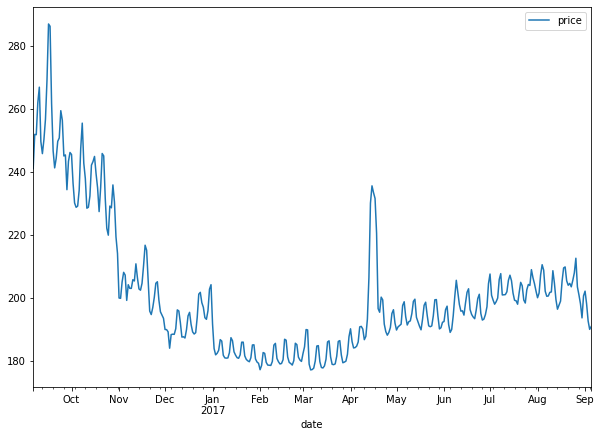

In [98]:
# Plot time-series:
prices.plot( x = 'date', y = 'price', figsize = (10,7))
plt.show()

- The period between 09/2016 and 04/2017, the total prices decrease. This time was not time for vacations: the weather is cold, so not many people want to visit beach. Therefore, the prize can’t be high.

- In the middle of April, the prices suddenly increase highly. After further investigation, the increase is due to the Boston Marathon, one of the world’s oldest and most challenging races. The marathon took place on April 15.

- After April, the prices go up slightly. It’s summer time, and many people want to visit beautiful beaches in Boston.

From this analysis, the best time to do Business is from April to September.

## Q3. Which features will have high impact on prices ?

In [99]:
# Find strong correltaed columns:
corr_cols = []
for col in abs(1-prep_df.corr()['price']).index:
    if (1 - abs(prep_df.corr()['price']))[col] < 0.9:
        corr_cols.append(col)
print(len(corr_cols))
corr_cols 

31


['thumbnail_url',
 'medium_url',
 'xl_picture_url',
 'host_url',
 'host_acceptance_rate',
 'host_thumbnail_url',
 'host_picture_url',
 'room_type',
 'bed_type',
 'security_deposit',
 'cleaning_fee',
 'cancellation_policy',
 'require_guest_phone_verification',
 'host_listings_count',
 'host_total_listings_count',
 'latitude',
 'longitude',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'square_feet',
 'price',
 'guests_included',
 'availability_30',
 'availability_60',
 'review_scores_rating',
 'review_scores_cleanliness',
 'review_scores_location',
 'calculated_host_listings_count',
 'reviews_per_month']

In [100]:
# Find weights of these feautures:
pd.DataFrame(model.coef_, X.columns)

,0
host_acceptance_rate,0.060957
cleaning_fee,0.313074
host_listings_count,0.012699
latitude,545.985125
longitude,202.618554
accommodates,5.839224
bathrooms,43.753815
bedrooms,37.742334
beds,-0.387386
guests_included,2.089318


We can see this once again: locations will have very high impact on rental price. Some other features are important, such as room type private or not (related to security), reviews score, bathroom and bedroom.

## Q4. Can we predict the rental price of new listings based on a model ?

In [145]:
# Calculate R2 score on test set:
r2_score(Y_test,model.predict(X_test))

0.64185019913315

In [146]:
# Calculate R2 score on train set:
r2_score(Y_train, model.predict(X_train))

0.6437414259154152

We can see that the listed features can explain 64% of the variability in the price for Boston Airbnb